# Project : Clustering

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
data = pd.read_csv("10_Population_Data.csv")
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


In [6]:
## isolate numeric columns 
numeric = ['Indians','Foreigners','Indian_Male','Indian_Female','Foreigners_Male','Foreigners_Female','Total Population']

In [7]:
# function to remove comma
def cleaner(z):
    return z.replace(',','')

In [8]:
# removing comma from all numeric data
for i in data[numeric]:
    data[i] = data[i].apply(cleaner)
    
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331


In [9]:
## converting data type to numeric
data[numeric]= data[numeric].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     int64 
 3   Foreigners          38 non-null     int64 
 4   Indian_Male         38 non-null     int64 
 5   Indian_Female       38 non-null     int64 
 6   Foreigners_Male     38 non-null     int64 
 7   Foreigners_Female   38 non-null     int64 
 8   Total Population    38 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.8+ KB


In [10]:
# checking sum of indians and foreigners is equal to total population or not

data[['Indians','Foreigners']].sum().sum() - data['Total Population'].sum()

0

In [11]:
data[['Indian_Male','Indian_Female','Foreigners_Male','Foreigners_Female']].sum().sum() - data['Total Population'].sum()

-112859

In [12]:
MF_total = data['Indian_Male'] + data['Indian_Female'] + data['Foreigners_Male'] + data['Foreigners_Female']
data['Others'] = data['Total Population'] - MF_total
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,Others
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191


In [13]:
data[['Region','Office Location Id']].nunique()

Region                38
Office Location Id    38
dtype: int64

* Few columns are dont satisfy property of clusters 'items from a cluster should be similar'
* Those columns are 'region', 'Office location id'
* addition of 'indians', 'foreigners' is satisfying 'total population', so we dont need multiple variables giving same info.

In [14]:
data1 = data.drop(columns = ['Region','Office Location Id'])
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,Others
0,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,194379,650744,161803,32576,631660,10652,845123,8432
3,107360,470708,85343,22017,450267,6389,578068,14052
4,55351,329980,31796,23555,325105,3684,385331,1191


In [15]:
data_bkp = data1.copy()

In [16]:
## scaling data
# we will scale data non traditional method
# define function which convert all values to which percent they are from total

def percent_convert(data,columns):
    '''
    this will take values and convert them in percent of total
    '''
    
    for i in columns:
        data[i] = data[i]/data1['Total Population']
        
    return data.drop(['Total Population'], axis = 1)

In [17]:
data_scaled = percent_convert(data1, data1.drop(columns = ['Total Population']).columns)
data_scaled.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Others
0,0.182457,0.817543,0.124865,0.057593,0.783505,0.020558,0.013480
1,0.175611,0.824389,0.117177,0.058433,0.795520,0.015189,0.013681
2,0.230001,0.769999,0.191455,0.038546,0.747418,0.012604,0.009977
3,0.185722,0.814278,0.147635,0.038087,0.778917,0.011052,0.024309
4,0.143645,0.856355,0.082516,0.061129,0.843703,0.009561,0.003091


In [18]:
# plotting elbow curve for K-Means
from sklearn.cluster import KMeans
SSE = []
for c in range(1,10):
    km = KMeans(n_clusters = c)
    km.fit(data_scaled)
    SSE.append(km.inertia_)

C:\anacondafolder\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


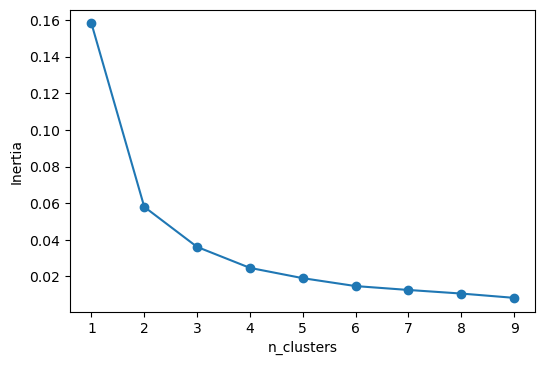

In [19]:
plt.figure(dpi = 100)
plt.plot(range(1,10), SSE, marker ='o')
plt.xlabel('n_clusters')
plt.ylabel('Inertia')
plt.show()

* elbow point = we are getting drastic direction change in inertia at cluster no 2, it will be elbow point

In [20]:
km2 = KMeans(n_clusters = 2)
km2.fit(data_scaled)
pred = km2.predict(data_scaled)
data_scaled['clusters'] = pred
data_scaled.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Others,clusters
0,0.182457,0.817543,0.124865,0.057593,0.783505,0.020558,0.013480,0
1,0.175611,0.824389,0.117177,0.058433,0.795520,0.015189,0.013681,0
2,0.230001,0.769999,0.191455,0.038546,0.747418,0.012604,0.009977,0
3,0.185722,0.814278,0.147635,0.038087,0.778917,0.011052,0.024309,0
4,0.143645,0.856355,0.082516,0.061129,0.843703,0.009561,0.003091,1


In [21]:
data2 = data_scaled.copy()

In [22]:
# defining function for segregsting variables values according to clusters 

def seg(str_x, str_y, clusters):
    x=[]
    y=[]
    
    for i in range(clusters):
        x.append(data2[str_x][data2['clusters']== i])
        y.append(data2[str_y][data2['clusters']== i])
        
    return x, y

In [24]:
## function for plotting variables against each others

def plot_clusters(str_x, str_y, clusters):
    plt.figure(figsize = (5,5), dpi = 120)
    
    x,y = seg(str_x, str_y, clusters)
    
    for i in range(clusters):
        plt.scatter(x[i], y[i], label = 'cluster{}'.format(i))
    
    plt.xlabel(str_x)
    plt.ylabel(str_y)
    plt.title(str_x +' vs '+ str_y)
    plt.legend()
    plt.show()
    return''

In [25]:
# dwc = data without clusters
dwc = data2.drop(['clusters'], axis = 1)

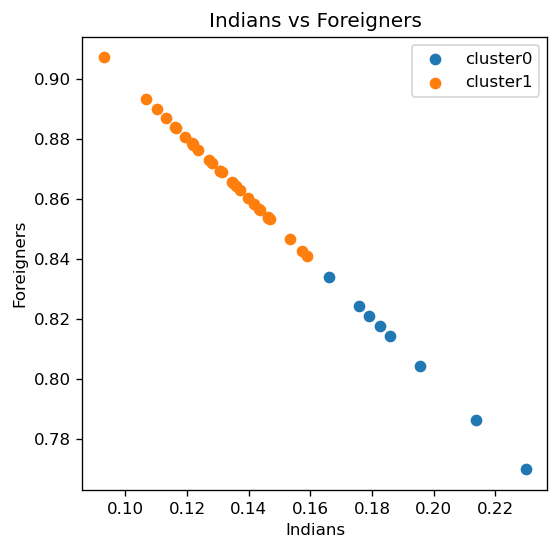

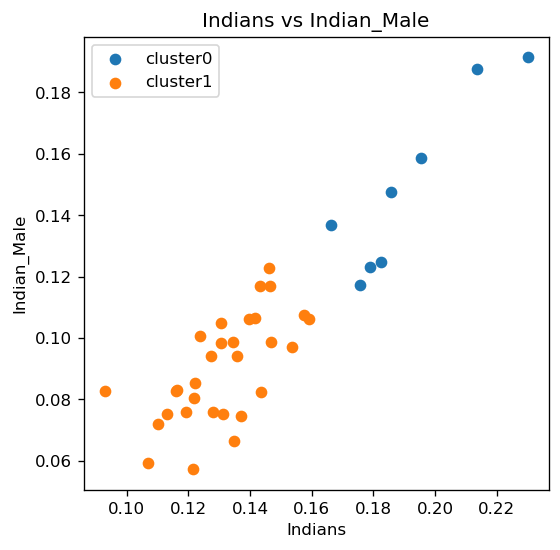

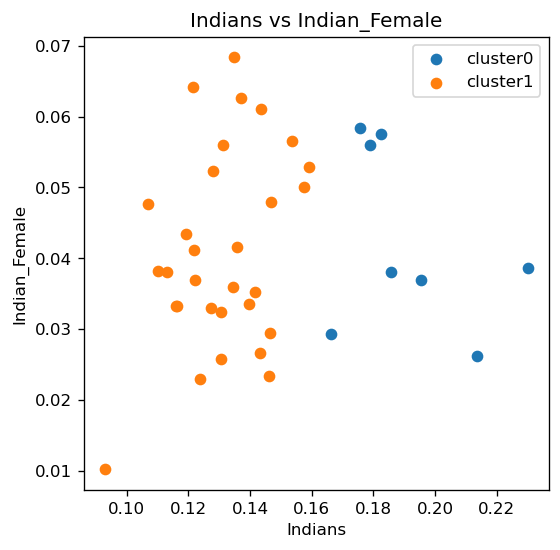

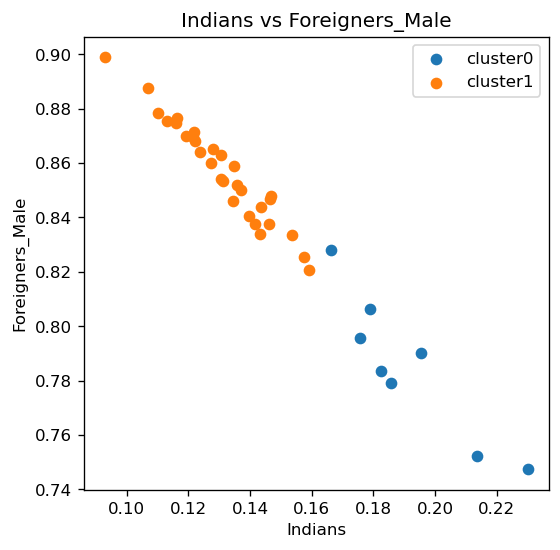

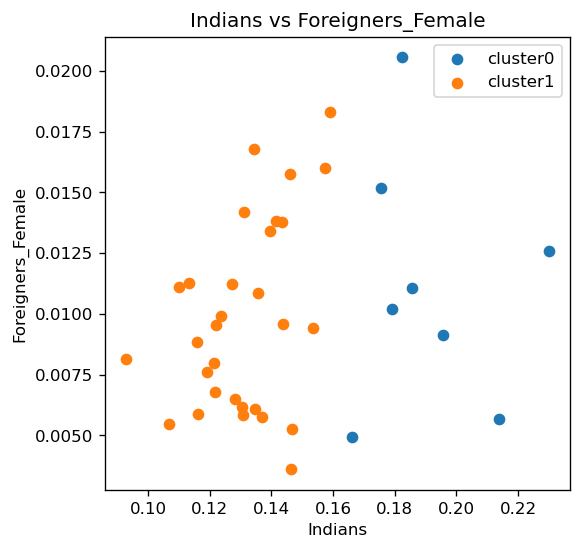

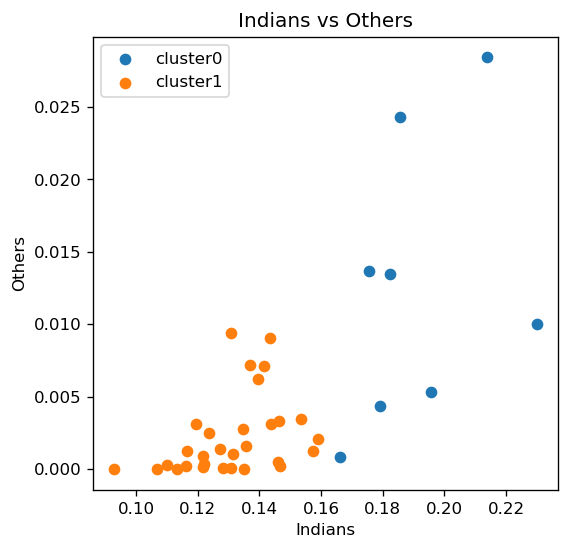

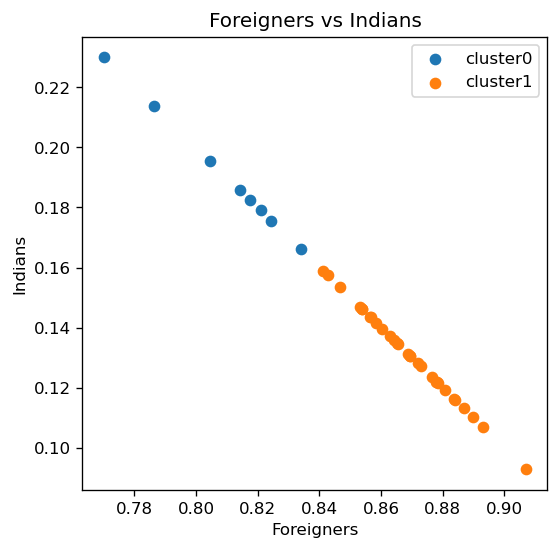

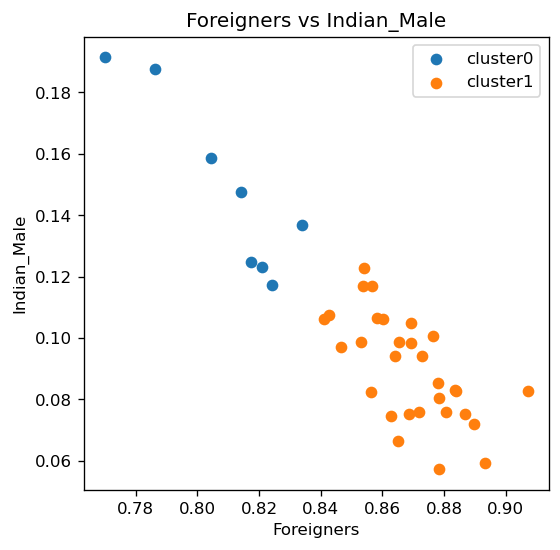

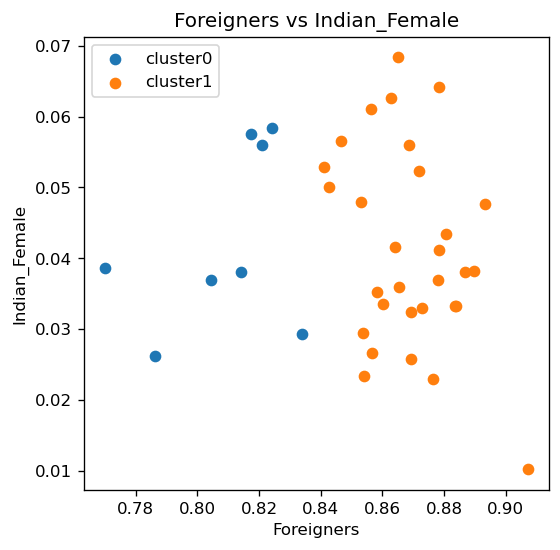

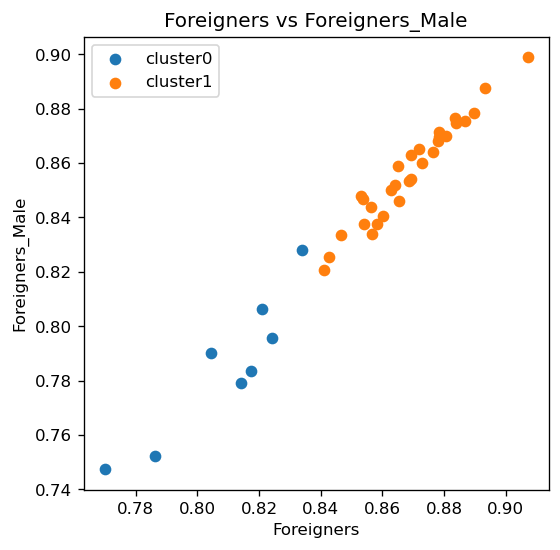

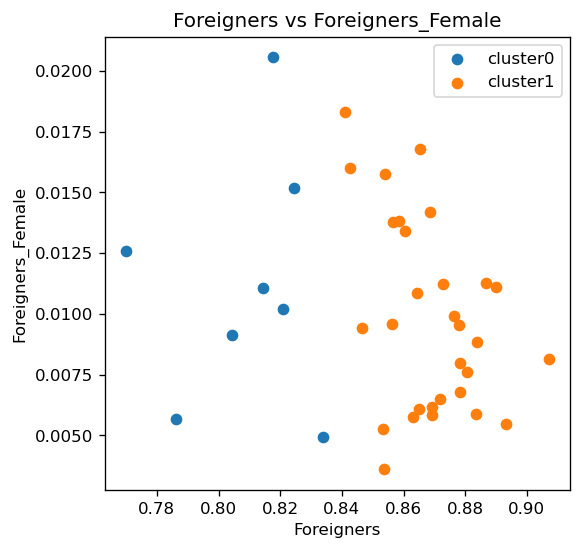

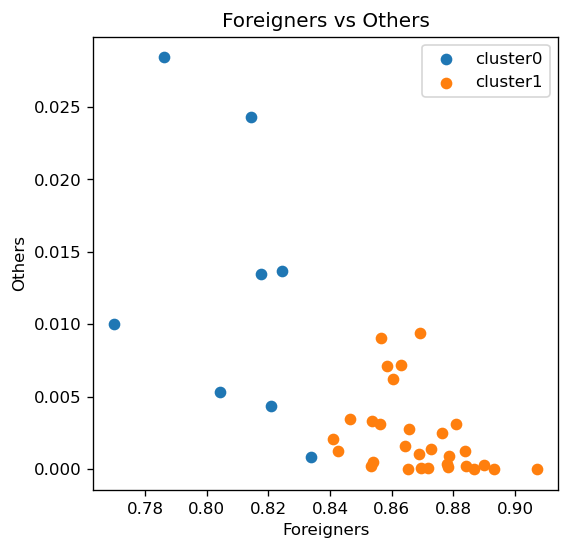

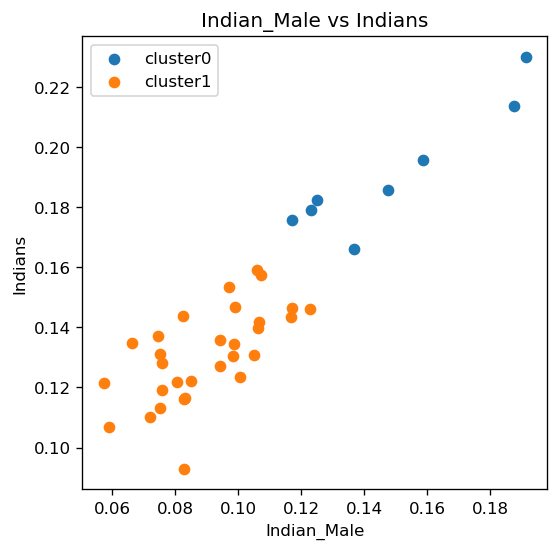

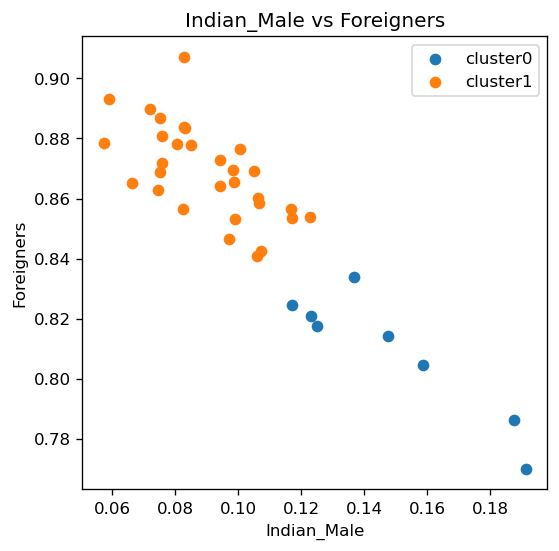

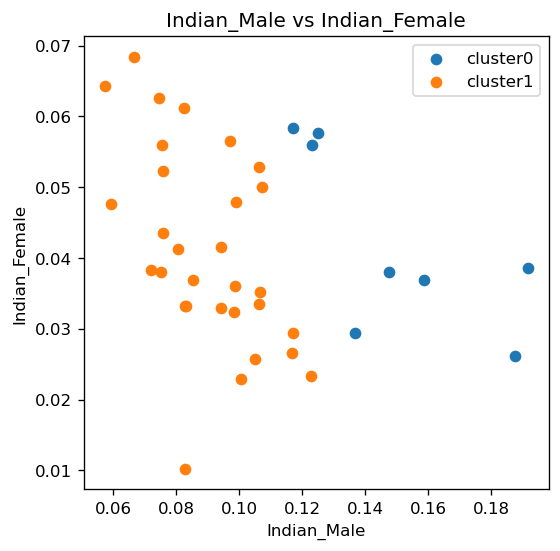

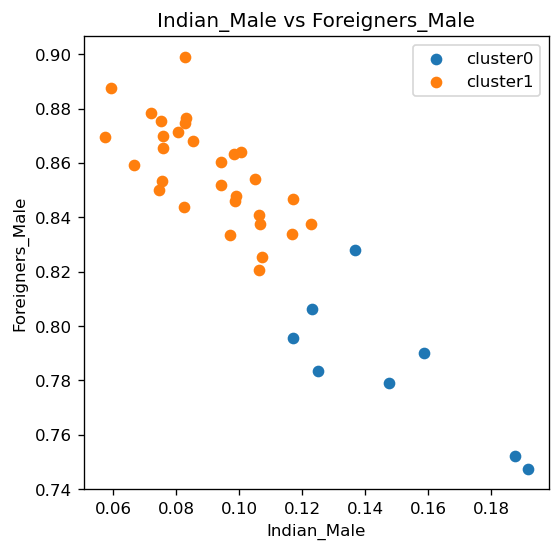

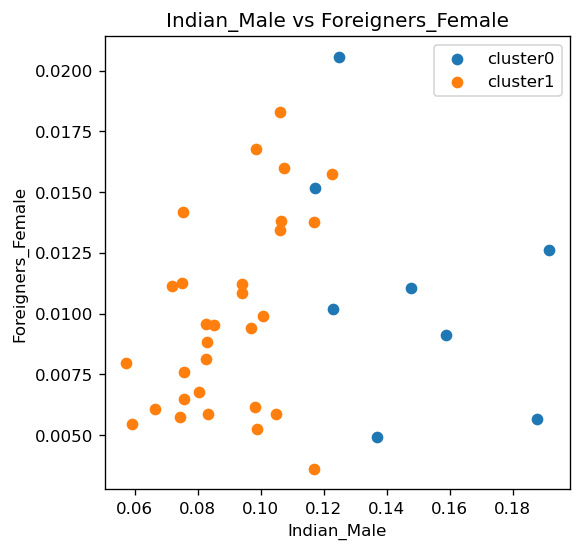

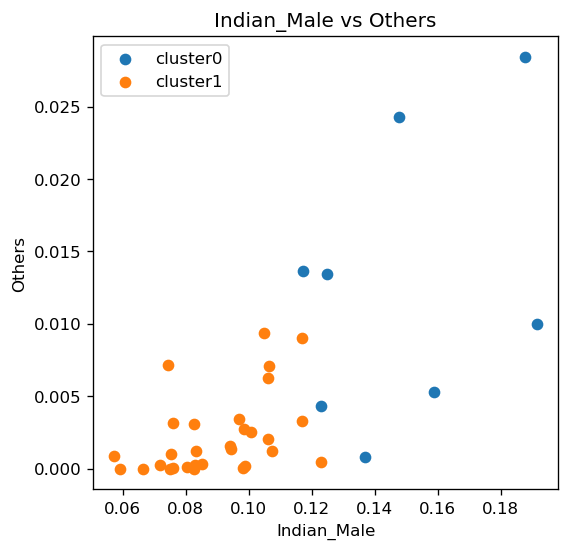

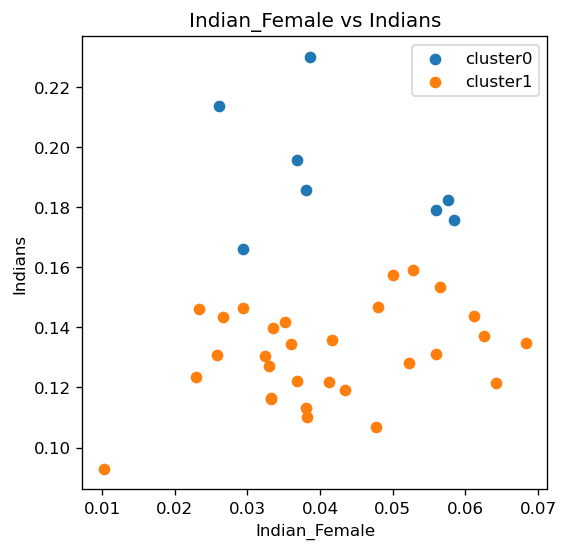

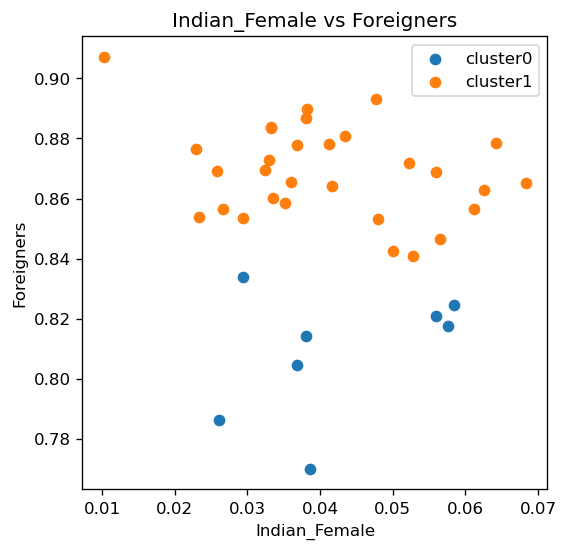

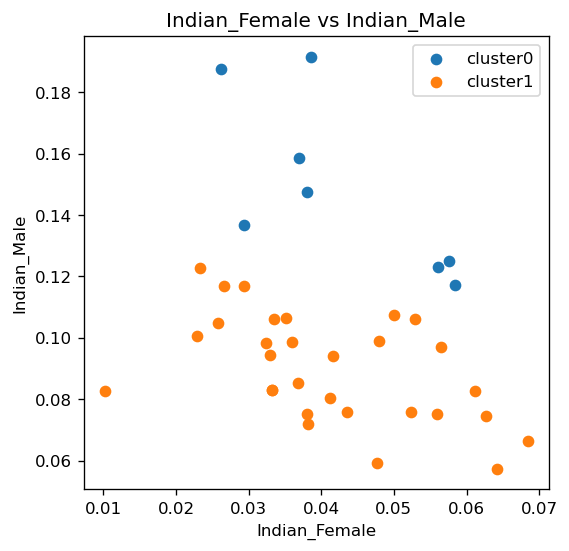

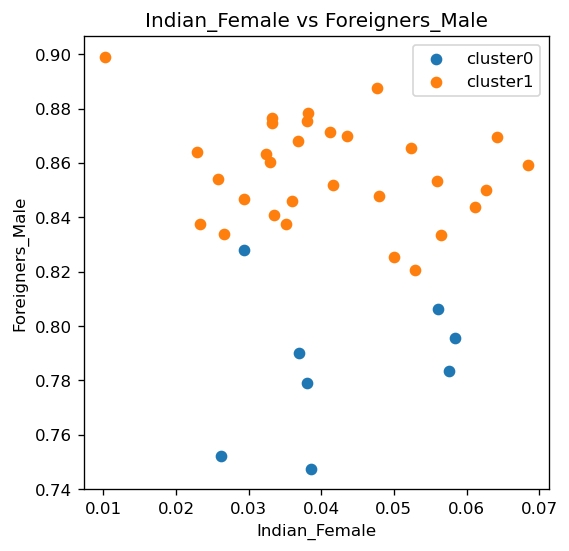

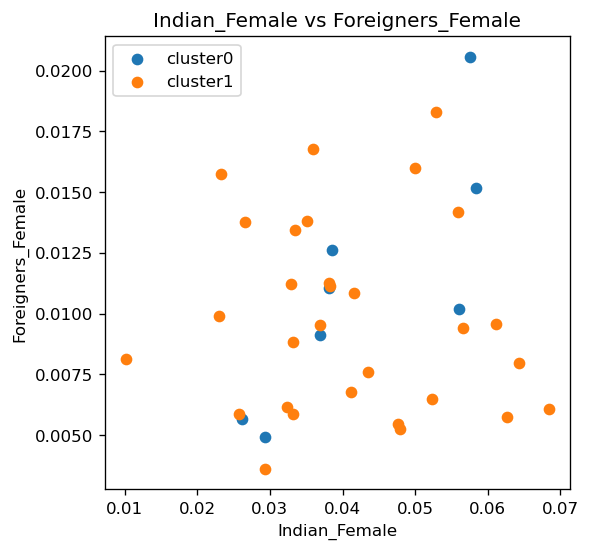

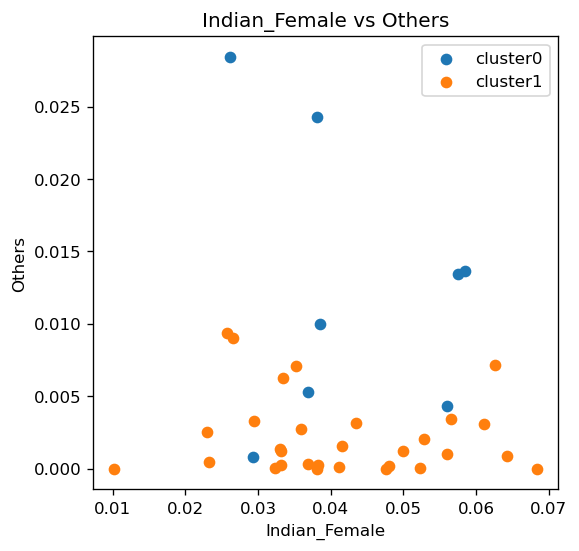

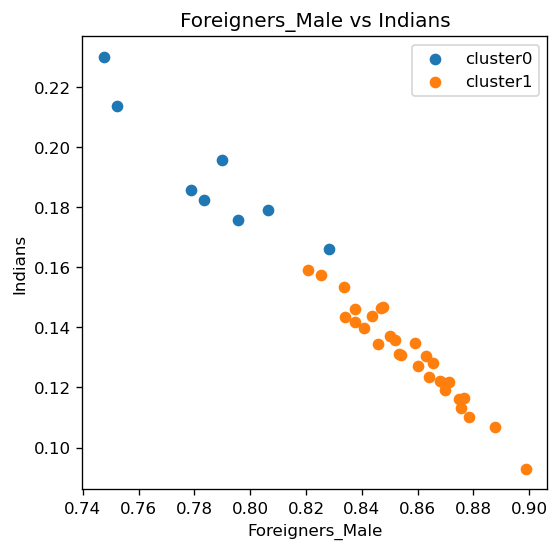

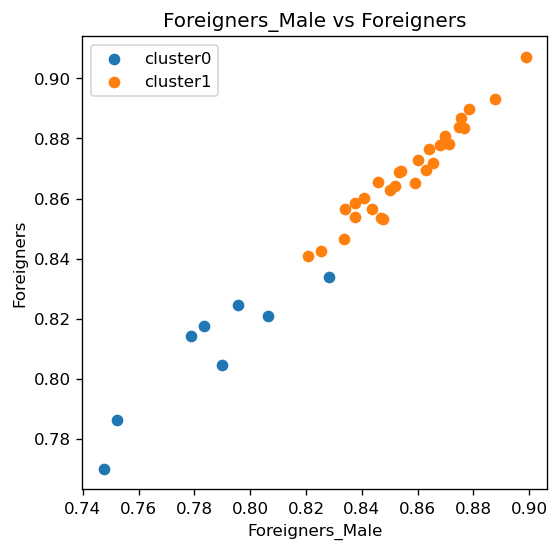

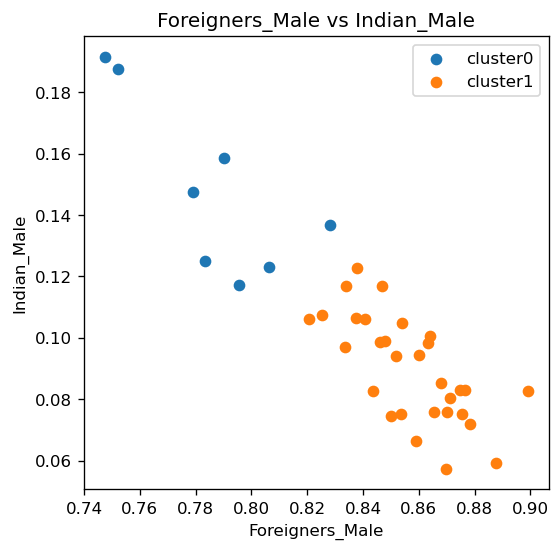

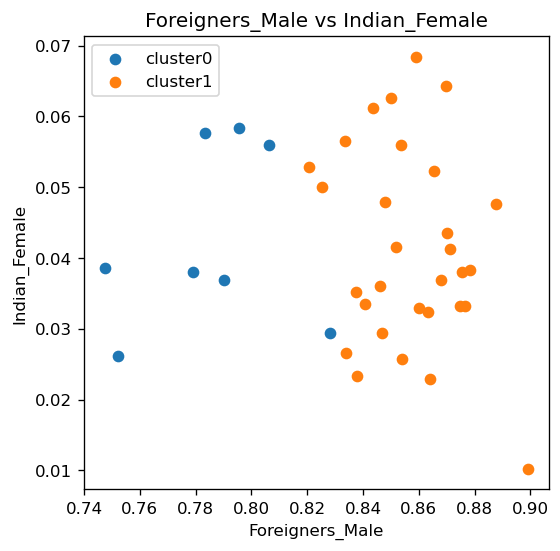

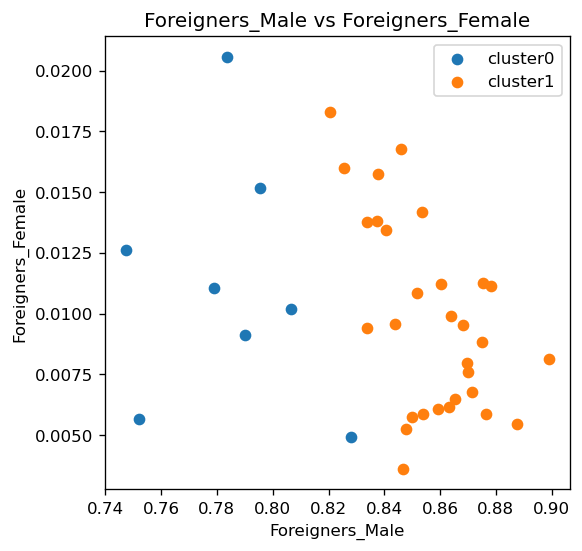

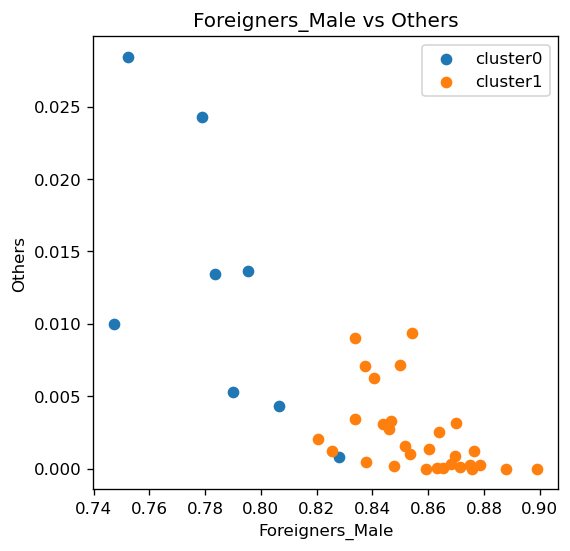

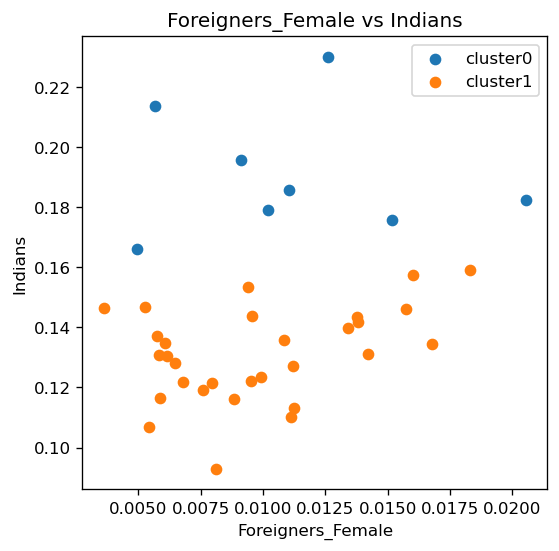

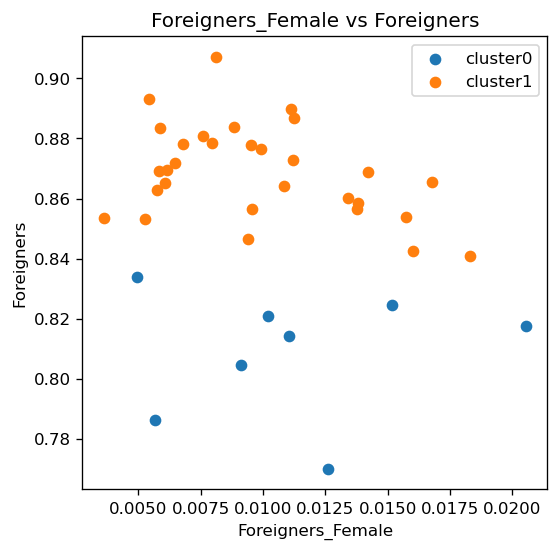

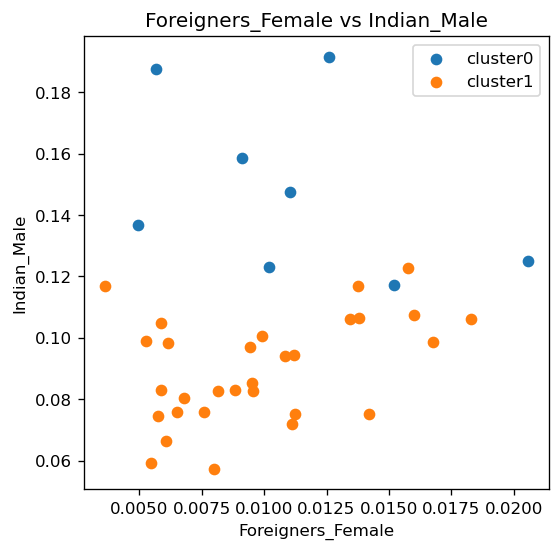

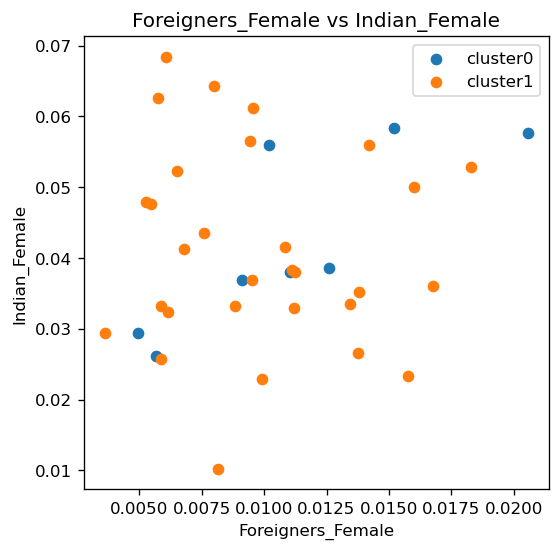

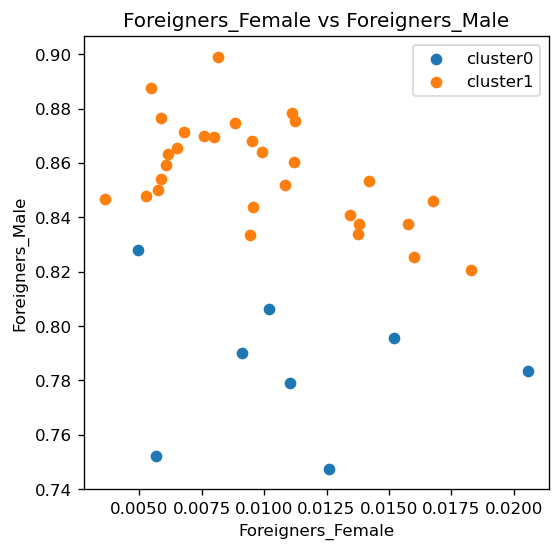

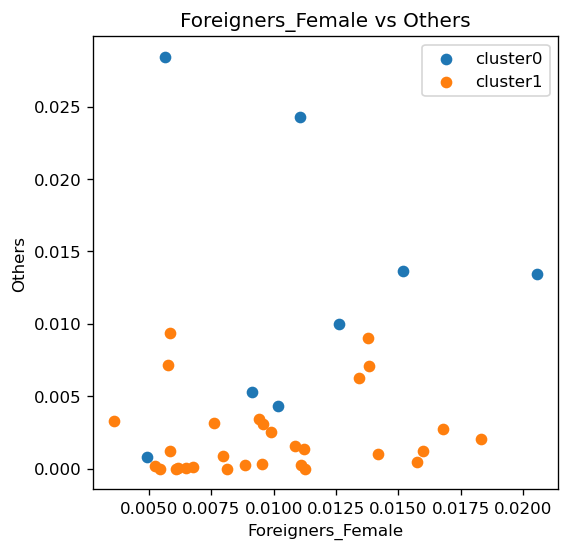

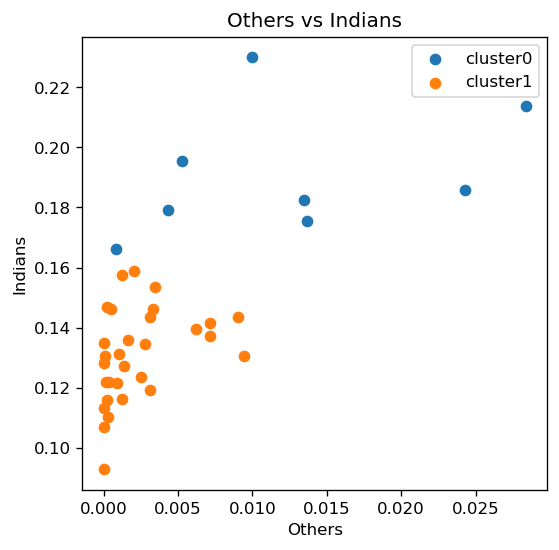

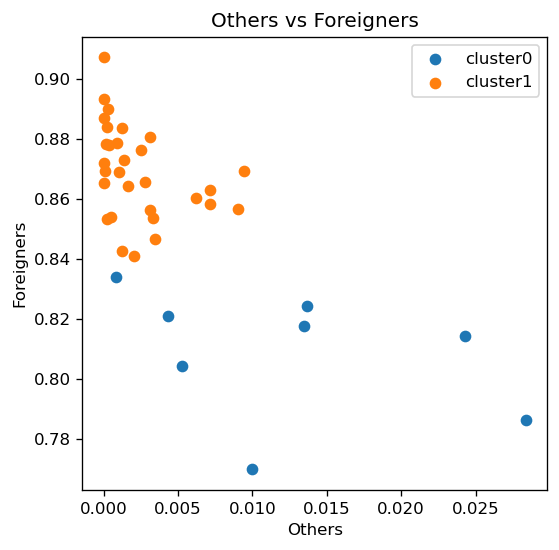

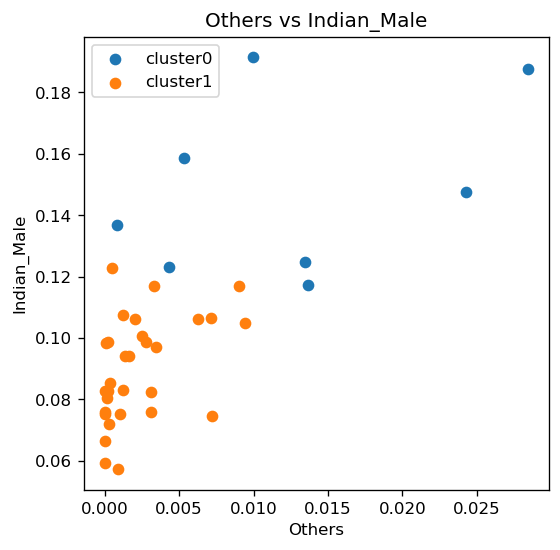

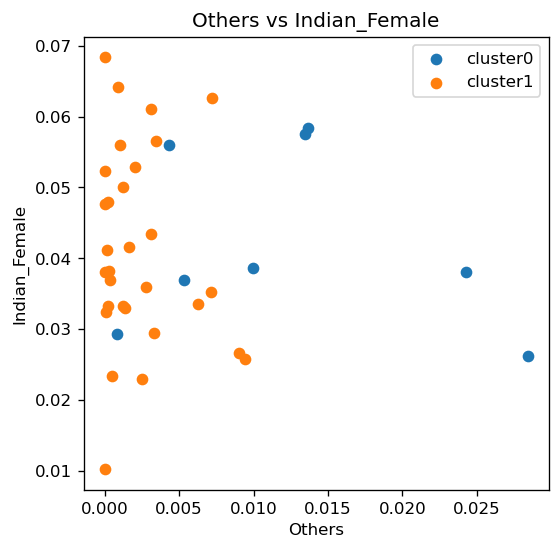

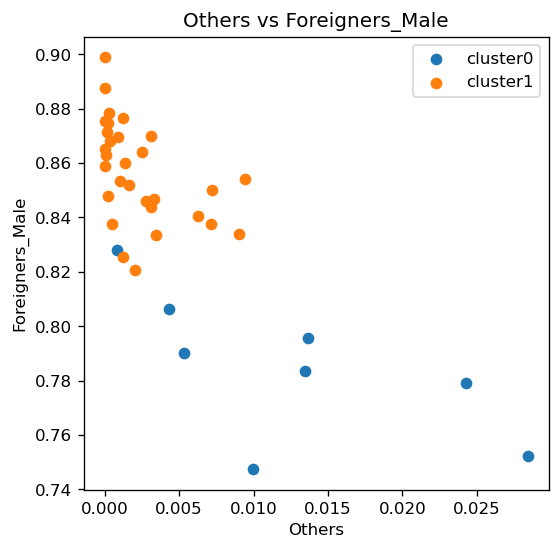

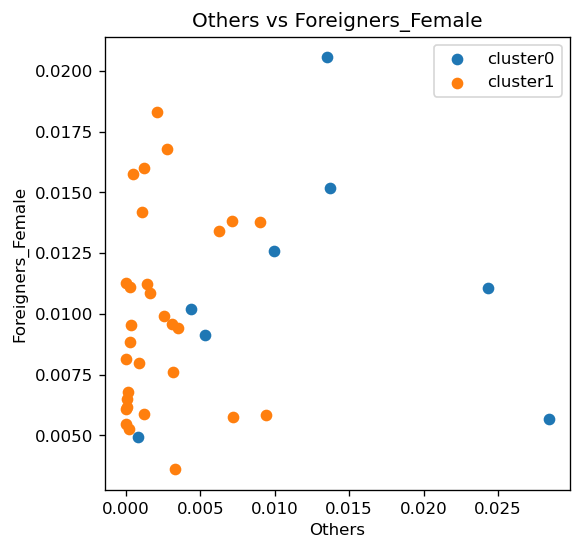

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [27]:
[plot_clusters(x,y,2) for x in dwc.columns for y in dwc.columns if x!=y]